In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_16 import *
css_styling()

# Extended maximum likelihood estimates 

# Udvidet maksimal sandsynlighed estimater

## Purpose 

- To formulate the concept of _extended maximum likelihood estimates_ (E-MLE)
- To use E-MLE to estimate model parameters when 
  - the model PDF is not normalised 
  - the number of observations are considered a random variable 

## Formål

- At formulere begrebet _udvidet maksimale sandsynlighedsestimater_ (E-MLE)
- At bruge E-MLE til at estimere modelparametre, når
  - PDF-modellen er ikke normaliseret
  - antallet af observationer betragtes som en tilfældig variabel

## Introduction

## Introduktion

The method of Maximum Likelihood Estimate (see [here](#Maximum-likelihood-estimate-(MLE))) consists of maximising the likelihood 

$$\mathcal{L}(x|\hat\theta) = \prod_{i=1}^{N} f(x_i;\hat\theta)\quad,$$ 

where $f$ is a _normalised_ probability density function (PDF) with parameters $\hat\theta$ and 

$$x = \{x_i,|i=1,\ldots,N\}\quad,$$ 

is a sample of size $N$.   Typically, computation wise, instead of maximising $\mathcal{L}$ we will _minimize_ the negative logarithm of the likelihood 

$$-\ell(x|\hat\theta) = -\log\mathcal{L} = \sum_{i=1}^{N}\log f(x_i,\hat\theta)\quad.$$ 

The [_Extended Maximum Likelihood Estimate_](http://inspirehep.net/record/297773/) (E-MLE) method considers that $N$ itself to be a Poisson random variable 

$$N\sim \mathcal{P}[\lambda]\quad\text{with}\quad f_{\mathcal{P}}(N;\nu) = \frac{\nu^N e^{-\nu}}{N!}\quad.$$ 

Thus, the likelihood is changed to 

$$\mathcal{L}_{E}x|\nu,\hat\theta) = \frac{\nu^N e^{-\nu}}{N!}\prod_{i=1}^{N} f(x_i,\hat\theta)\quad.$$

Note that the parameter $\nu$ becomes a _new free_ parameter of the likelihood.

Metoden til beregning af maksimal sandsynlighed (se [her](#Maksimale-sandsynligheds-estimat-(MLE))) består i at maksimere sandsynligheden

$$\mathcal{L}(x|\hat\theta) = \prod_{i=1}^{N} f(x_i;\hat\theta)\quad,$$

hvor $f$ er en _normaliseret_ sandsynlighedsfunktion (PDF) med parametre $\hat\theta$ og

$$x = \{x_i,|i=1,\ldots,N\}\quad,$$

er en prøve af størrelse $N$. Typisk vil vi, beregningsmæssigt, i stedet for at maksimere $\mathcal{L}$  _minimere_ den negative logaritme af sandsynligheden

$$-\ell(x|\hat\theta) = -\log\mathcal{L} = \sum_{i=1}^{N}\log f(x_i,\hat\theta)\quad.$$

Metoden [_Extended Maximum Likelihood Estimate_](http://inspirehep.net/record/297773/) (E-MLE) betragter $N$ i sig selv som en Poisson tilfældig variabel

$$N\sim \mathcal{P}[\lambda]\quad\text{with}\quad f_{\mathcal{P}}(N;\nu) = \frac{\nu^N e^{-\nu}}{N!}\quad.$$

Således ændres sandsynligheden til

$$\mathcal{L}_{E}x|\nu,\hat\theta) = \frac{\nu^N e^{-\nu}}{N!}\prod_{i=1}^{N} f(x_i,\hat\theta)\quad.$$

Bemærk, at parameteren $\nu$ bliver en _ny fri_ parameter til sandsynligheden. 

## Derivation 

We want to turn a PDF 

$$ f(x,\hat\theta) = \ldots\quad,$$ 

into a form suitable for E-MLE.  The regular likelihood is given by 

## Udledning

Vi ønsker at lave en PDF af formen

$$ f(x,\hat\theta) = \ldots\quad,$$

om til en form der er egnet til E-MLE. Den sædvanlige sandsynlighed er givet af

In [3]:
from sympy import symbols, IndexedBase, Function, Eq, product
N, i = symbols('N i',  integer=True,positive=True)
p    = symbols(r'thetahat', real=True)
x    = IndexedBase('x', real=True)
L    = Function('Lcal', real=True, positive=True)(x,p)
f    = Function('f',    real=True, positive=True)
Eq(L,product(f(x[i],p),(i,1,N)))

Eq(Lcal(x, thetahat), Product(f(x[i], thetahat), (i, 1, N)))

The E-MLE method prescribes how we must modify this.  Exactly how to modify the likelihood function depends on whether $f$ is normalized 

E-MLE-metoden foreskriver, hvordan vi skal ændre dette. Præcis hvordan man ændrer sandsynlighedsfunktionen, afhænger af, om $f$ er normaliseret

In [4]:
from sympy import Integral
xx = symbols('x')
Eq(Integral(f(xx,p),xx),1)

Eq(Integral(f(x, thetahat), x), 1)

or not.  If $f$ _is_ normalized, then the E-MLE likelihood function becomes 

eller ej. Hvis $f$ _er_ normaliseret, bliver E-MLE-sandsynlighedsfunktionen

In [5]:
from sympy import exp as syexp, factorial
nu    = symbols('nu',real=True,positive=True)
L     = Function('Lcal_E',real=True,positive=True)(x,nu,p)
Lnorm = (product(f(x[i],p),(i,1,N)) * nu**N * syexp(-nu)/factorial(N))#.factor()
Eq(L,Lnorm)

Eq(Lcal_E(x, nu, thetahat), nu**N*exp(-nu)*Product(f(x[i], thetahat), (i, 1, N))/factorial(N))

of which the logarithm becomes 

af hvilken logaritmen bliver

In [6]:
from sympy import log as sylog, Sum, gamma
ell   = Function('ell_E',real=True,positive=True)(x,nu,p)
lnorm = sylog(Lnorm).expand()
CE    = (lnorm - Sum(sylog(f(x[i],p)),(i,1,N))).simplify().replace(factorial(N),gamma(N+1))
Eq(ell,lnorm)

Eq(ell_E(x, nu, thetahat), N*log(nu) - nu - log(factorial(N)) + Sum(log(f(x[i], thetahat)), (i, 1, N)))

Note, in general we can ignore the $\log(N!)$ term since this is constant for a given problem and hence does not change the sought maximum.  However, if we do not include the term in the computations we may experience numerical instabilities (`exp` of large numbers), so we will keep the term in the following. 

Bemærk, at vi generelt kan ignorere $\log(N!)$-udtrykket, da dette er konstant for et givet problem og derfor ikke ændrer det søgte maksimum. Men hvis vi ikke inkluderer termen i beregningerne, kan vi opleve numeriske ustabiliteter (`exp` for store tal), så vi vil beholde leddet i det følgende.

If $f=g$ is _not_ normalized, we should still follow the above. We note that the _normalized_ PDF $g$ is given by 

Hvis $f=g$ er _ikke_ normaliseret, skal vi stadig følge ovenstående. Vi bemærker, at den _normaliseret_ PDF $g$ er givet ved

In [7]:
from sympy import Lambda 
g = Function('g',real=True,positive=True)
A = Function('A',real=True,positive=True)(p)
h = Lambda((x,p),g(x,p)/A)
Eq(Function('h')(x,p),h(x,p),evaluate=False)

Eq(h(x, thetahat), g(x, thetahat)/A(thetahat))

where 

hvor

In [8]:
Eq(A,Integral(g(xx,p),xx))

Eq(A(thetahat), Integral(g(x, thetahat), x))

Note, $A$ geneally depends on $\hat\theta$.  We find 

Bemærk, $A$ er sædvanligvis afhænger af $\hat\theta$. Vi finder

In [9]:
Lun = Lnorm.replace(f(x[i],p),h(x[i],p)).simplify()
Eq(L,Lun)

Eq(Lcal_E(x, nu, thetahat), nu**N*A(thetahat)**(-N)*exp(-nu)*Product(g(x[i], thetahat), (i, 1, N))/factorial(N))

of which the logarithm becomes 

af hvilken logaritmen bliver

In [10]:
lun = sylog(Lun).expand(force=True).simplify()
Eq(ell,lun)

Eq(ell_E(x, nu, thetahat), N*log(nu) - N*log(A(thetahat)) - nu - log(factorial(N)) + Sum(log(g(x[i], thetahat)), (i, 1, N)))

It is important to note that the extended likelihoods have _one more_ free parameter ($\nu$) than the regular likelihoods. 

Det er vigtigt at bemærke, at den udvidet sandsynlighed har _en ekstra_ fri parameter ($\nu$) end den sædvanlige  sandsynlighed.

## Implementation 

We will do the implementation of this decorator slightly differently then the others.  First of all, we want the decorator to carry _state_ so that we may cache expensive calculations (e.g. $\log(N!)\approx\log\left(\Gamma(N+1)\right)$).  Secondly, we want to reuse code as much as possible without having to jump through hoops.  Thus, the _inner_ decorator will be implemented as a _class_. 

But before we get to that point, we need to be able to evaluate 

## Implementering

Vi vil implementere denne _decorator_ lidt anderledes end de andre. Først og fremmest ønsker vi, at vores dekoratøren skal have _tilstand_, så vi kan gemme dyre beregninger (f.eks. $\log(N!)\approx\log\left(\Gamma(N+1)\right)$). For det andet ønsker vi at genbruge koden så meget som muligt uden at skulle sno os for meget. Således bliver den _indre_ dekoratøren implementeret som en _klasse_.

Men inden vi kommer til dette punkt, er vi nødt til at kunne evaluere

$$A=\int_D\mathrm{d}x\,F(x,\hat\theta) = \int_D\mathrm{d}x\,e^{L(x,\hat\theta)}\quad,$$ 

in the case of an (logarithmic) unnormalised PDF.  To make this easy we define two classes which both returns $\log(A)$.  The first class is for a normalised PDF, and thus always returns zero.   

i tilfælde af en (logaritmisk) ikke-ormaliseret PDF. For at gøre dette let definerer vi to klasser, som begge returnerer $\log(A)$. Den første klasse er for en normaliseret PDF, og returnerer således altid nul.

We will reimplement `llh` and `binned_llh` to calculate the extended logarithmic likelihood in case they keyword `extended=True` is passed.  For the reqular likelihood (`llh`) we will calculate 

Vi vil genimplementere `llh` og `binned_llh` for at beregne den udvidede logaritmiske sandsynlighed, hvis nølgeordet `extended=True` er givet. For den almindlige logatimiske sandsynlighed (`llh`) beregner vi

\begin{align*}
  \ell_{E}{\left(x,\nu,\hat{\theta} \right)} 
  &= \underbrace{- N \log{\left(A \right)} + N \log{\left(\nu \right)} - \nu - \log{\left(N! \right)}}_{C_E} 
  + \sum_{i=1}^{N} \log{\left(f{\left({x}_{i},\hat{\theta} \right)} \right)}\\  
  &= C_E + \ell\left(x,\hat\theta\right)\quad,
\end{align*}

in the extended case, while for the binned logarithmic likelihood, we will calculate 

i det udvidede tilfælde, mens vi beregner for den logaritmiske sandsynlighed i bøtter

\begin{align*}
  \ell_{EB}{\left(n_i,\nu,\hat{\theta} \right)} 
  &= \underbrace{- N \log{\left(A \right)} + N \log{\left(\nu \right)} - \nu - \log{\left(N! \right)}}_{C_E} 
  + \sum_{i=1}^{m}n_i\log(v(i,\hat\theta)\underbrace{{}-\sum_{i=1}^{m}\log\Gamma(n_i+1)+\log\Gamma(N)}_{C_B}\\
  &= C_E + \ell_{B}\left(n,\hat\theta\right)\quad.
\end{align*}

Thus, in both cases we must calculate 

I begge tilfælde skal vi således beregne

$$C_E = - N \log{\left(A \right)} + N \log{\left(\nu \right)} - \nu - \log{\left(N! \right)}\quad,$$

which we implement in a function. 

som vi implementerer i en funktion.

In [11]:
def _extended_c(N,A,nu):
    from numpy import log,inf, isnan
    from scipy.special import gammaln 
    
    ls = log(nu/A)
    if isnan(ls):
        return -inf 
    
    return N * ls - nu - gammaln(N+1)

The extended maximum likelihood estimator will add another parameter ($\nu$) to the list of free parameters.  We will automatically add that parameter in as the first parameter of the fit, but in our reimplementations of `llh` and `binned_llh`, we must be able to extract $\nu$ reliably.  Thus, we implement a simple function to extract $\nu$ in the case of E-MLE (or `None` for regular MLE). 

Den udvidede maksimale sandsynlighedsestimator tilføjer en anden parameter ($\nu$) til listen over frie parametre. Vi skal tilføje automatisk denne parameter som den første parameter i fit når vi kalder `mle_fit`. I vores reimplementeringer af `llh` og `binned_llh`, skal vi være i stand til at udtrække $\nu$ pålideligt. Således implementerer vi en simpel funktion til at udtrække $\nu$ i tilfælde af E-MLE (eller `None` for almindelig MLE).

In [12]:
def _nu_theta(extended,fst,*args):
    def _inner(f,*a):
        if not extended:
            return None,(f,*a)
        return f,a
    
    return _inner(*fst)

To calculate the integral of the unnormalized PDF $g$, we define the helper function `_pdf_intg`, which used _SciPy_'s general integrator `quad`. 

For at beregne integralet af den ikke-ormaliseret PDF $g$ definerer vi hjælperfunktionen `_pdf_intg `, som bruger  _SciPy_' s generelle integrator `quad`.

In [13]:
def _pdf_intg(f,x,*args,logpdf,rnge):
    from numpy import min, max, exp, log, inf
    from scipy.integrate import quad
    
    e = exp if logpdf else (lambda x : x)
    
    if rnge is None:
        rnge = min(x), max(x)
    
    ff = lambda x,*args : e(f(x,*args))
    return quad(ff,*rnge,args=args)[0]

We also write a another function which will guarantee two return values from an argument.  We will use that in `llh` and `binned_llh` below, although the meaning of this will only become apparent later (bare with us).  Suffice to say, that we will allow a PDF (or CDF in case of `binned_llh`) to return two values, and that we will take the second value as a _nuissance_ (logarithmic) probability. 

Vi skriver også en funktion, der garanterer to returværdier fra et argument. Vi vil bruge det i `llh` og `binned_llh` nedenfor, selvom betydningen først vil blive klart senere (bare med os). Her nøjes vi med at sige, at vi tillader en PDF (eller CDF i tilfælde af `binned_llh`) at returnere to værdier, og at vi vil tage den anden værdi som en _irretations_ (logaritmisk) sandsynlighed .

In [14]:
def _two(a):
    try:
        a1, a2 = a 
        return a1,a2
    except:
        pass
    return a,0

For binned logarithmic likelihood we utilize the fact that we _either_ get the CDF, or that we have samples of the PDF in bins.  In the first case, we simply calculate the integral as the difference of the CDF evaluated at the extremes, while in the later case, we will use Simpson's integral rule (implemented in `scipy.integration.simps`) to do the same.  We will, however, not implement a helper function for this.  Instead, we will add that to our new implementation of `binned_llh` for efficiency reason. 

So without more ado, let us implement the new `llh` function. 

For logaritmisk sandsynlighed over bøtter udnytter vi det faktum, at vi _enten_ får CDF, eller at vi har prøver af PDF'en i bøtter. I det første tilfælde beregner vi integralet som forskellen på CDF'en evalueret i enderne, mens vi i det senere tilfælde vil bruge Simpsons integrale regel (implementeret i `scipy.integration.simps`) til at gøre det samme. Vi vil dog ikke implementere en hjælperfunktion til dette. I stedet vil vi tilføje det til vores nye implementering af `binned_llh` af effektivitetsgrunde.

Lad os implementere den nye `llh` funktion uden videre.

In [15]:
def llh(f,x,*theta,logpdf=False,extended=False,normalized=True,rnge=None,xtra=None):
    from numpy import errstate, log, where, inf, atleast_1d, isnan, asarray
    
    with errstate(all='ignore'):  # NaN -> -inf
        nu, th = _nu_theta(extended,*theta)
        y, yn  = _two(f(x,*th))
        y      = atleast_1d(y)

        if not logpdf:
            y  = where(y>0, log(y), -inf)
            yn = log(yn) if yn > 0 else 0

        y[isnan(y)] = -inf

        ce = 0
        if extended:
            A  = 1 if normalized else _pdf_intg(f,x,*th,logpdf=logpdf,rnge=rnge)
            ce = _extended_c(len(x),A,nu)

        xx = xtra(*th) if xtra is not None else 0

        return y.sum(axis=0) + ce + xx + yn

Note that we have added a number of keyword arguments to `llh`: 

- `extended` if this is `True`, then we calculate $C_E$ and add that to the returned value 
- `normalized` if this is `False`, then we integrate the PDF over the range (either given by the data or by the keyword `rnge`)
- `rnge` optional range to integrate the PDF over. 

Now, let us turn to the reimplementation of `binned_llh`. Again, we add keyword arguments to the reimplementation. 

Bemærk, at vi har tilføjet et antal søgeordsargumenter til `llh`:

-`'udvidet`, hvis dette er `True`, beregner vi $C_E$ og tilføjer det til den returnerede værdi
- `normaliseret`, hvis dette er `False`, så integrerer vi PDF-filen over området (enten givet af dataene eller ved nøgleordet `rnge`)
- `rnge` valgfrit interval for at integrere PDF'en over.

Lad os nu vende os til genimplementeringen af`binned_llh`. Igen tilføjer vi nøgleordsargumenter til genimplementeringen.

In [16]:
def binned_llh(f,data,*theta,
               logpdf=False, cdf=False, density=1,
               poisson=False,extended=False,normalized=True,
               log_Gamma_Nn=None,raw_n=None, xtra=None):
    from numpy import errstate, asarray, diff, log, inf, isnan, any, where, exp
    from scipy.integrate import simps
    
    nu, th = _nu_theta(extended,*theta)
    bins   = asarray(data[0])
    counts = asarray(data[1])
    
    with errstate(all='ignore'):
        A     = 0
        if not cdf:
            x    = (bins[1:]+bins[:-1])/2 
            y,yn = _two(f(x,*th))  # Approximate integral by f(x)*w
            w    = diff(bins)

            if not logpdf:
                y  = where(y>0, log(y), -inf)    
                yn = log(yn) if yn > 0 else 0

            y += log(w)  # log(y*w) = log(y) + log(w)
            A =  exp(y).sum()

        else:
            y, yn = _two(f(bins,*th))
            
            if logpdf:
                y = exp(y)
            else:
                yn = log(yn) if yn > 0 else 0

            A = y[-1] - y[0]
            y = diff(y)
            y = where(y > 0, log(y), -inf)

        y[isnan(y)] = -inf 

        AA       = A if not normalized and not poisson else 1
        n        = binned_llh_n(bins,counts,density) if raw_n is None else raw_n
        cbN, cbn = binned_llh_c(n) if log_Gamma_Nn is None else log_Gamma_Nn
        ce       = _extended_c(n.sum(),AA,nu) if extended else 0

        xx = xtra(*th) if xtra is not None else 0

        return (y*n).sum() + (-A if poisson else cbN) + cbn + ce + xx + yn

We must reimplement `mlefit` one final time to allow for the new keyword arguments of `llh` and `binned_llh`.  

Vi skal genimplementere `mlefit` en sidste gang for at give mulighed for de nye nøgleordsargumenter af `llh` og `binned_llh`.

In [17]:
def sel_llh(data,kwargs):
    from numpy import atleast_1d
    
    # common keyword arguments
    kw    = {'extended':   kwargs.pop('extended',  False),
             'logpdf':     kwargs.pop('logpdf',    False),
             'normalized': kwargs.pop('normalized',True),
             'xtra':       kwargs.pop('xtra',      None)}
    tomax = llh
        
    if len(data) == 2:
        from numpy import asarray
        bins, counts   = asarray(data[0]), asarray(data[1])
        if len(bins) - 1 == len(counts):
            density = kwargs.pop('density',   1)
            n       = binned_llh_n(bins,counts,density)
            # Special keyword arguments for binned
            kw.update({'density':       density,
                       'cdf':           kwargs.pop('cdf',       False), 
                       'poisson':       kwargs.pop('poisson',   False),
                       'raw_n':         n,
                       'log_Gamma_Nn':  binned_llh_c(n)})
            tomax   = binned_llh
            
    return tomax,kw

In [18]:
def mle_fit(f,data,p0,*args,**kwargs):
    # Filter special keywords for binned
    tomax,kw = sel_llh(data,kwargs)
                
    return maximize_llh(f,data,p0,tomax,*args,kw=kw,**kwargs)

### Test of implementation

### Test af implementering

First, we generate some data to test on.  We will draw $M=1000$ samples from an exponential distribution with a scale parameter $\lambda=4$.  That is our sample is 

$$X\sim \mathcal{E}[4]\quad f(x,\lambda) = \lambda e^{-\lambda x}\quad.$$


Først genererer vi nogle data, vi kan teste på. Vi tager $M=1000$ prøver fra en eksponentiel fordeling med en skalaparameter $\lambda=4$. Det er vores prøve

$$X\sim \mathcal{E}[4]\quad f(x,\lambda) = \lambda e^{-\lambda x}\quad.$$

In [19]:
from numpy.random import exponential, seed

seed(42)
data = exponential(4,size=1000)

Let us draw the sample as a histogram.  Note, we will _not_ use the histogram below.  E-MLE - as MLE - works directly on the $M$ observations - the histogram is for illustration purposes only. 

Lad os tegne prøven som et histogram. Bemærk, vi _ikke_ bruger histogrammet herunder. E-MLE - ligesom MLE - fungerer direkte på $M$-observationer - histogrammet er kun til illustration.

Data that we want to fit to. 

Data, som vi ønsker at passe til.

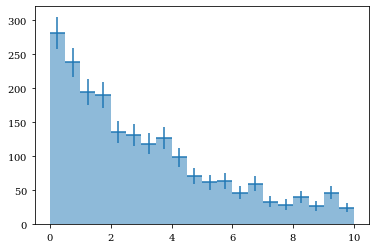

In [20]:
from numpy import linspace 

b = linspace(0,10,21)
h = histogram(data,b)
plot_hist(*h,alpha=.5,as_bar=True,ecolor='C0',label='Histogram');

Next, we define our PDFs.  Some are normalised, others are not.  

Dernæst definerer vi vores PDF funktioner. Nogle er normaliserede, andre ikke. 

\begin{align*}
\text{Normalized PDF}              &:& f(x,\lambda) &= \lambda e^{-\lambda x}\\
\text{Normalized logarithmic PDF}  &:& l(x,\lambda) &= \log\lambda -\lambda x\\
\text{Unnormalized PDF}            &:& F(x;\lambda) &= e^{-\lambda x}        \\
\text{Unnormalized logarithmic PDF}&:& L(x;\lambda) &= -\lambda x            \\
\end{align*}

For comparison we also perform a regular MLE on the normalized PDF and logarthmic PDF. 

Til sammenligning udfører vi også en almindelig MLE på den normaliseret PDF og logarthmiske PDF.

Extended maximum likelihood fits of normalized (first column) and unnormalized (second column) PDFs (top row) and logarithmic PDFs (second row), as well as regular MLE (third column).

Udvidet maksimal sandsynlighed for normaliseret (første kolonne) og unormaliseret (anden kolonne) PDF'er (øverste række) og logaritmiske PDF'er (anden række) samt almindelig MLE (tredje kolonne).

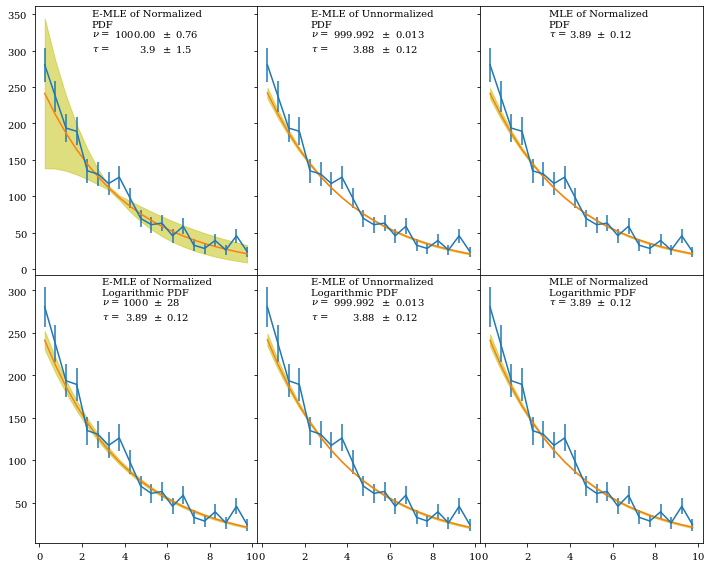

In [21]:
from scipy.stats import expon
from numpy import exp
from matplotlib.pyplot import subplots 

fig, ax = subplots(ncols=3,nrows=2,sharey='row',sharex='col',
                   gridspec_kw=dict(wspace=0,hspace=0),
                   figsize=(10,8))

def gg(x,s,tau):
    return s*expon.pdf(x,scale=tau)
   
    
nf  = lambda t,tau: expon.pdf(t,scale=tau)
nlf = lambda t,tau: expon.logpdf(t,scale=tau)
uf  = lambda t,tau: exp(-t/tau)
ulf = lambda t,tau: -t/tau
pn  = [r'\nu',r'\tau']
for f,n,l,e,a in zip([nf,    uf,    nf,    nlf,  ulf,   nlf],
                     [True,  False, True,  True, False, True],
                     [False, False, False, True, True,  True],
                     [True,  True,  False, True, True,  False],
                     ax.ravel()):

    p0 = (1,3) if e else (3)
    ff = gg if e else (lambda t,tau : gg(t,len(data),tau))
    nn = pn if e else pn[1:]  
    p,cov,opt = mle_fit(f,data,p0,full_output=True,logpdf=l,extended=e,normalized=n)

    tit = f'{"E-" if e else ""}MLE of '\
          f'{"N" if n else "Unn"}ormalized\n'\
          f'{"Logarithmic "if l else ""}PDF'
    plot_fit(h[1],h[0],h[3],ff, p, cov,ax=a,nsig=2,
             tbl_kw={'title':tit,'loc':'upper center'}, 
             parameters=nn,chi2=False,pvalue=False)
        
fig.tight_layout()

We will also test the binned maximum likelihood estimates using our histogram defined above. We perform the E-MLE on PDF and CDF. 

Vi tester også estimaterne af den maksimale sandsynlighed for data i bøtter, med vi vores histogram defineret ovenfor. Vi udfører E-MLE på PDF og CDF.

Extended, binned maximum likelihood fits of various normal (top) or logarithmic (bottom) PDFs and CDFs (last column). 

Udvidet, maksimal sandsynlighed i bøtter for forskellige normale (øverste eller logaritmiske (nederste) PDF'er og CDF'er (sidste kolonne).

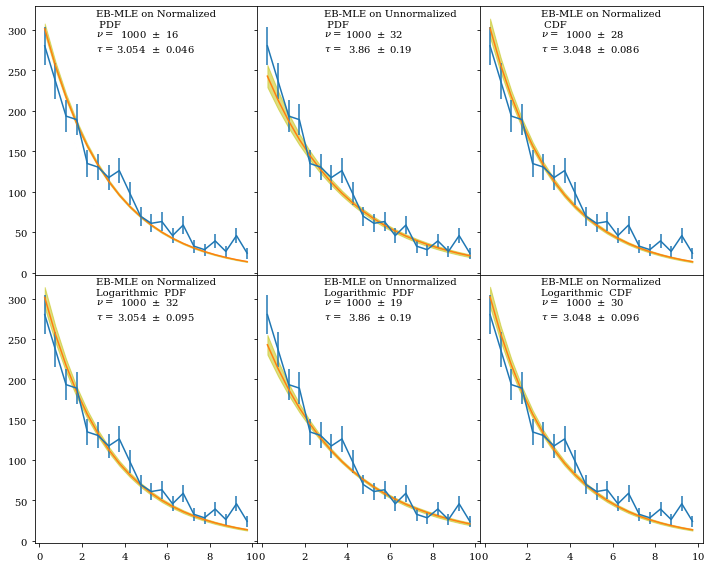

In [22]:
fig, ax = subplots(ncols=3,nrows=2,sharey='row',sharex='col',
                   gridspec_kw=dict(wspace=0,hspace=0),
                   figsize=(10,8))

nc  = lambda t,tau : expon.cdf(t,scale=tau)
nlc = lambda t,tau : expon.logcdf(t,scale=tau)
for f,n,l,c,a in zip([nf,        uf,     nc,    nlf,   ulf,   nlc],
                     [True,      False,  True,  True,  False, True],
                     [False,     False,  False, True,  True,  True],
                     [False,     False,  True,  False, False, True],
                     ax.ravel()):

    p,cov,opt = mle_fit(f,(b,h[0]),(1,3),full_output=True,logpdf=l,
                        extended=True,normalized=n,cdf=c,tol=1e-6)
    
    tit = f'EB-MLE on '\
          f'{"N" if n else "Unn"}ormalized\n'\
          f'{"Logarithmic " if l else ""} '\
          f'{"CDF" if c else "PDF"}'
    plot_fit(h[1],h[0],h[3],gg, p, cov,ax=a,nsig=2,
             tbl_kw={'title':tit,'loc':'upper center'},
             parameters=pn,chi2=False,pvalue=False)

fig.tight_layout()

### Example: Original example 

Here we will reproduce the example given in [_Nucl.Instr.Meth._ **A297**(1990)496-506](http://inspirehep.net/record/297773/).   We have two underlying distributions 

\begin{align*}
  S &\sim \mathcal{N}[\mu,0.05] & B &\sim\mathcal{N}[0.5,0.05]\quad,\\
\end{align*}

from which we draw $N_S$ and $N_B$ samples, where 

\begin{align*}
  N_S &\sim\mathcal{P}[\nu_S] & N_B &\sim\mathcal{P}[80]\quad.
\end{align*}

Our unnormalized PDF is then 

$$
F(x;\mu_s) = \nu_S\frac{1}{\sqrt{2\pi}0.05}e^{-\frac12\left(\frac{x-a}{0.05}\right)^2}
  + \underbrace{\nu_B\frac{1}{\sqrt{2\pi}0.05}e^{-\frac12\left(\frac{x-0.5}{0.05}\right)^2}}_{
     \text{constant wrt. parameters}}$$

which has free parameters $\mu$ and $\nu_S$. 

### Eksempel: Det oprindelige eksempel

Her vil vi gengive eksemplet givet i [_Nucl.Instr.Meth._ **A297** (1990) 496-506](http://inspirehep.net/record/297773/ ). Vi har to underliggende distributioner

\begin{align*}
  S &\sim \mathcal{N}[\mu,0.05] & B &\sim\mathcal{N}[0.5,0.05]\quad,\\
\end{align*}

hvorfra vi tegner $N_S$ og $N_B$ prøver, hvor

\begin{align*}
  N_S &\sim\mathcal{P}[\nu_S] & N_B &\sim\mathcal{P}[80]\quad.
\end{align*}

Vores ikke-ormaliserede PDF er dermed

$$
F(x;\mu_s) = \nu_S\frac{1}{\sqrt{2\pi}0.05}e^{-\frac12\left(\frac{x-a}{0.05}\right)^2}
  + \underbrace{\nu_B\frac{1}{\sqrt{2\pi}0.05}e^{-\frac12\left(\frac{x-0.5}{0.05}\right)^2}}_{
     \text{constant wrt. parameters}}$$

som har frie parametre $\mu$ og $\nu_S$.

We define functions to generate our data samples - one for the $S$ and $B$ separately and one for the combined sample. 

Vi definerer funktioner til at generere vores dataprøver - en for $S$ og $B$ hver for sig og en for den kombinerede prøve.

In [23]:
def sample(mu,nu,sigma=0.05):
    from numpy.random import normal, poisson
    
    return normal(mu,sigma,size=poisson(nu))

def both(mus=0.4,mub=0.5,nus=20,nub=80,sigma=0.05):
    from numpy import concatenate
    
    s = sample(mus,nus)
    b = sample(mub,nub)
    d = concatenate((s,b))
    return s, b, d 

We generate our sample(s) and plot them as histograms.  Note, in the analysis we will _not_ use the histograms - this is for illustration purposes only. 

Vi genererer vores prøve r) og plotter dem som histogrammer. Bemærk, i analysen vil vi _ikke_ bruge histogrammerne - dette er kun til illustration.

Background and signal data to fit. 

Baggrunds- og signaldata, vil vil tilpasse til.

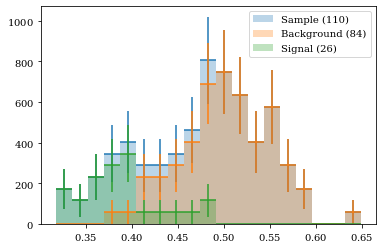

In [24]:
from matplotlib.pyplot import legend 
from numpy.random import seed 

seed(321) # 321
s, b, d = both()
x  = linspace(d.min(),d.max(),20)
hs = histogram(s,x)
hb = histogram(b,x)
hd = histogram(d,x)
plot_hist(*hd,as_bar=True,alpha=.3,ecolor='C0',label=f'Sample ({len(d)})')
plot_hist(*hb,as_bar=True,alpha=.3,ecolor='C1',label=f'Background ({len(b)})')
plot_hist(*hs,as_bar=True,alpha=.3,ecolor='C2',label=f'Signal ({len(s)})')
legend();

Next, we define our PDF 

Dernæst definerer vi vores PDF

In [25]:
from scipy.stats import norm 

pb = norm(0.5,0.05)
def f(x,nus,mus,nub=80,pb=pb):    
    return nus*norm.pdf(x,mus,0.05) + nub*pb.pdf(x)

We are now ready to do our fit.  We pass the decorated PDF `f` as our argument to `mlefit`, as well as our observations `d` and the initial guess of the parameter values. 

Vi er nu klar til at udfører vores kurve-tilpasning. Vi giver den dekoreret PDF `f` som argument til `mlefit`, såvel som vores observationer `d 'og den første gæt af parameterværdierne.

In [26]:
p, cov, = mle_fit(f,d,(100,15,0.35),normalized=False,extended=True)

Let us draw the result of the fit.  We will draw the full, signal, and background samples, as well as the full,  signal, and background PDFs using the fitted parameter values.  Furthermore, we will draw a contour plot of our parameters.

Lad os tegne resultatet af estimatet. Vi tegner totale-, signal- og baggrundsprøverne såvel som de totale-, signal- og baggrunds-PDF'er ved hjælp af de fundne parameterværdier. Desuden tegner vi et konturdiagram af vores parametre.

Result of fitting (left) to signal and background data and confidence contours (right).

Resultat af tilpasning (venstre) til signal- og baggrundsdata og tillidskonturer (højre).

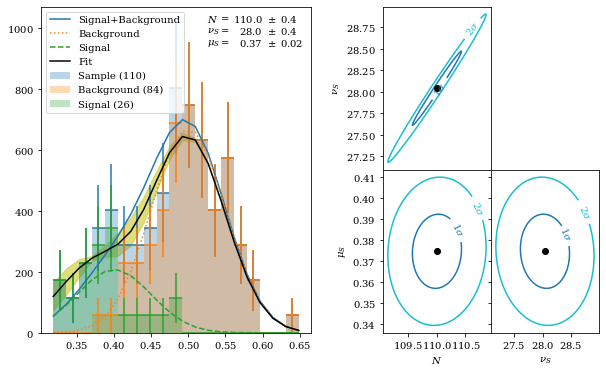

In [27]:
from matplotlib.pyplot import figure, sca, plot
from numpy import sqrt, diagonal

g   = lambda t,nu,*args : f(t,*args)
fig = figure(figsize=(10,6))
ax  = fig.subplots(ncols=1,nrows=1,gridspec_kw=dict(right=.5))
sca(ax)
pn = ['N',r'\nu_S',r'\mu_S'] #,r'\nu_B']
sy = len(s) * norm.pdf(x,0.4,0.05)
by = len(b) * norm.pdf(x,0.5,0.05)
plot_hist(*hd,as_bar=True,alpha=.3,ecolor='C0',label=f'Sample ({len(d)})')
plot_hist(*hb,as_bar=True,alpha=.3,ecolor='C1',label=f'Background ({len(b)})')
plot_hist(*hs,as_bar=True,alpha=.3,ecolor='C2',label=f'Signal ({len(s)})')
plot     (x,sy+by,'-',              color='C0',label='Signal+Background')
plot     (x,by,   ':',              color='C1',label='Background')
plot     (x,sy,   '--',             color='C2',label='Signal')
plot_fit_func(x,g,p,cov,color='k',label='Fit')  
plot_fit_table(p,sqrt(diagonal(cov)),parameters=pn)
legend(loc='upper left')

plot_nsigma_contour(p,cov,[1,2],parameters=pn,fig=fig,
                    gridspec_kw=dict(left=.6));

## Summary 

In this chapter we have developed a method for extended maximum likelihood estimates (E-MLE).  We have modified the function `llh` to be able calculate the extended (regular) logarithmic likelihood 

## Opsummering

I dette kapitel har vi udviklet en metode til udvidede estimater for maksimal sandsynlighed (E-MLE). Vi har ændret funktionen `llh` for at kunne beregne den udvidet (regelmæssige) logaritmiske sandsynlighed

\begin{align*}
  \ell_{E}{\left(x,\nu,\hat{\theta} \right)} 
  &= \underbrace{- N \log{\left(A \right)} + N \log{\left(\nu \right)} - \nu - \log{\left(N! \right)}}_{C_E} 
  + \sum_{i=1}^{N} \log{\left(f{\left({x}_{i},\hat{\theta} \right)} \right)}\\  
  &= C_E + \ell\left(x,\hat\theta\right)\quad,
\end{align*}

and `binned_llh` to be able to calculate the extended binned logarithmic likelihood 

og `binned_llh` til at være i stand til at beregne den udvidede logaritmiske sandsynlighed i bøtter

\begin{align*}
  \ell_{EB}{\left(n_i,\nu,\hat{\theta} \right)} 
  &= \underbrace{- N \log{\left(A \right)} + N \log{\left(\nu \right)} - \nu - \log{\left(N! \right)}}_{C_E} 
  + \sum_{i=1}^{m}n_i\log(v(i,\hat\theta)\underbrace{{}-\sum_{i=1}^{m}\log\Gamma(n_i+1)+\log\Gamma(N)}_{C_B}\\
  &= C_E + \ell_{B}\left(n,\hat\theta\right)\quad.
\end{align*}

The function `mle_fit` has been modified to pass appropriate arguments on to `llh` and `binned_llh`.  

Funktionen `mle_fit` er blevet ændret for at videregive passende argumenter til `llh` og `binned_ llh`.

In [28]:
llh.__doc__=\
    """Calculate the logarithmic likelihood 
    
        ell(x,theta) = sum_{i=1}^N log f(x_i;theta)
        
    given a (logarithmic) PDF and data.  Note, this _does not_ calculate the 
    _negative_ likelihood 
    
    Parameters
    ----------
    f : callable 
        (Logarithmic) PDF to evaluate 
    x : array-like 
        Observations 
    *theta : tuple 
        Parameters for f. Note, if extended=True, then 
        a first, additional parameter `nu` must be passed. 
    logpdf : bool 
        If true, assume f is the logarithmic PDF, otherwise the reqular PDF
    extended : bool 
        If true, calculate the extended logaritmic likelihood 
    normalized : bool 
        If true, and `extended=True`, calculate the integral of the passed PDF, 
        and include that in the extended logarithmic likelihood 
    xtra : callable 
        Extra contribution to log-likelihood evaluated at parameters (theta)
        
    Return
    ------
    ell : float 
        Logarithmic likelihood 
    
    See also
    --------
    mle_fit, maximize_llh, binned_llhWW
    """

In [29]:
binned_llh.__doc__=\
    """Calculate the binned logarithmic likelihood 
    
    Parameters
    ----------
    f : callable 
        PDF or CDF to fit to data 
    data : tuple(bins,data)
        bins : array-like 
            Bin boundaries 
        data : array-like 
            Bin content.  
        
            One of 
            
                Raw counts : density=0
                number density : (dN/dx) density=1 
                normalized number density : (1/N dN/dx) density=N 
    *theta : tuple 
        Parameters for f.  Note, if extended=True, then 
        a first, additional parameter `nu` must be passed. 
    logpdf : bool 
        Wether f is log of PDF (or CDF) 
    cdf : bool 
        Whether f is CDF or PDF 
    density : bool, int, float 
        Meaning of data argument 
    poisson : bool 
        If true, assume Poisson statistics.  That is, f gives the mean 
        of a Poisson distribution, and we evaulate the probability of 
        n given that mean. 
    extended : bool 
        If true, calculate the extended maximum logaritmic likelihood 
    normalized : bool 
        If false, and `extended=True` then assume the PDF is not normalized 
        and calculate the normalisation to be included in the logarithmic 
        likelihood 
    log_Gamma_Nn : float,float (optional)
        Correction terms for log-likelihood 
    raw_n : array-like (optional)
        Count equivalent in each bin 
    xtra : callable 
        Extra contribution to log-likelihood evaluated at parameters (theta)
        
    Returns
    -------
    ell : float 
        The log-likelihood (_not_ negative log-likelihood) to possibly maximize
        
    See also
    --------
    mle_fit, llh, maximize_llh
    
    """

In [30]:
mle_fit.__doc__=\
    """Do an MLE estimate of parameters of the PDF given data yield.
    
    Parameters
    ----------
    f : callable 
        The PDF 
    x : array-like to (array-like,array-like) 
        The observations. 
        
        If a single array-like argument is given, we perform a regular MLE fit. 
        
        If two array-like arguments are given, perform a binned MLE fit.  The first
        is assumed to be the bin boundaries, while the second is assumed to contain on of
        
        - raw counts (density=False)
        - number density (dN/dx), by setting density=True 
        - normalized number density (1/N dN/dx) by setting density=True and passing 
          N=N where N is the total normalization (e.g., number of observations) of 
          the sample. 
        
    p0 : array-like, size N 
        The initial guess of the parameter values.  Note, if `extended=True`, then 
        an additional first parameter `nu` must be passed in addition to the regular 
        PDF parameters. 
    full_output : bool 
        If set to true, return full minimizer output too 
    logpdf : bool 
        If set to true, assume `f` returns the logarithm of the PDF 
    poisson : bool 
        Only for binned MLE. If true, assume Poisson statistics.  That is, f gives the mean 
        of a Poisson distribution, and we evaulate the probability of 
        n given that mean. 
    extended : bool 
        If true, perform an extended maximum likelihood estimate.  Note, if this 
        is true, then the first parameter _must_ be the estimated abundance `nu`. 
    normalized : bool 
        If false, and `extended=True` assume the PDF is not normalized and 
        calculate the normalization and include that in the extended logarithmic
        likelihood function.  
    cdf : bool 
        Only for binned MLE.  The passed function is assumed to be the cumulative density 
        function.
    density : bool, int, float
        Only for binned MLE.  If True, then assume number density (dN/dx) is passed as 
        second data argument.  If a number not equal to 1, it is the total normalisation 
        of the normalized number density (1/N dN/dx) passed in the second data 
        argument. 
    *args : tuple 
        Arguments passed on to `scipy.optimize.minimize` 
    **kwargs : dict 
        Keyword arguments passed on to `scipy.optimize.minimize`
    
    Returns
    -------
    p : array-like, size N 
        MLE of the parameter values 
    cov : array-like size N*N 
        Covariance matrix of parameters (inverse Hessian) if 
        available from the minimizer, otherwise Non 
    opt : dict-like 
        Full minimizer output of `full_output` is true 
        
    See also
    -------- 
    minimize_llh, llh, binned_llh

    """